# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=123)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [4]:
from sklearn.linear_model import LinearRegression
price_house_boston = LinearRegression()
price_house_boston.fit(X_train, y_train)



LinearRegression()

In [5]:
y_train_predic = price_house_boston.predict(X_train)
y_test_predic = price_house_boston.predict(X_test)


## 3. Calculate and print R-squared for both the training and the testing set.

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_train, y_train_predic))
print(r2_score(y_test, y_test_predic))

0.7559380876016175
0.6592466510354119


## 4. Calculate and print mean squared error for both the training and the testing set.

In [8]:
print(mean_squared_error(y_train, y_train_predic))
print(mean_squared_error(y_test, y_test_predic))

20.677107947815138
28.19248575846936


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [10]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, y_train_predic))
print(mean_absolute_error(y_test, y_test_predic))

3.1749500258692462
3.6601528186976573


## Classification Model Evaluation

In [16]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [47]:
data.sample(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
110,6.5,3.2,5.1,2.0,2
57,4.9,2.4,3.3,1.0,1
21,5.1,3.7,1.5,0.4,0
13,4.3,3.0,1.1,0.1,0
85,6.0,3.4,4.5,1.6,1
62,6.0,2.2,4.0,1.0,1
142,5.8,2.7,5.1,1.9,2


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=123)

In [25]:
X_train.shape

(120, 4)

In [26]:
X_test.shape

(30, 4)

In [27]:
y_train.shape

(120, 1)

In [28]:
y_test.shape

(30, 1)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [30]:
from sklearn.linear_model import LogisticRegression
type_flower_model = LogisticRegression(max_iter = 10000)
type_flower_model.fit(X_train, y_train)

C:\Users\firem\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=10000)

In [31]:
y_train_predic = type_flower_model.predict(X_train)
y_test_predic = type_flower_model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(
    y_true=y_train,
    y_pred=y_train_predic
)

0.9833333333333333

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(
    y_true=y_test,
    y_pred=y_test_predic
)

1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [34]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(
    y_true=y_train,
    y_pred=y_train_predic
)

0.9838772338772338

In [35]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(
    y_true=y_test,
    y_pred=y_test_predic
)

1.0

## 10. Calculate and print the precision score for both the training and the testing set.

In [52]:
from sklearn.metrics import precision_score
precision_score(y_true=y_train,
    y_pred=y_train_predic, average='macro')

0.9838772338772338

In [53]:

precision_score(y_true=y_test,
    y_pred=y_test_predic, average='macro')

1.0

## 11. Calculate and print the recall score for both the training and the testing set.

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
recall_score(
    y_true=y_train,
    y_pred=y_train_predic, average='macro'
)

0.9838772338772338

In [56]:
recall_score(
    y_true=y_test,
    y_pred=y_test_predic, average='macro'
)

1.0

## 12. Calculate and print the F1 score for both the training and the testing set.

In [58]:
f1_score(
    y_true=y_train,
    y_pred=y_train_predic, average='macro'
)

0.9838772338772338

In [57]:
f1_score(
    y_true=y_test,
    y_pred=y_test_predic, average='macro'
)

1.0

## 13. Generate confusion matrices for both the training and the testing set.

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:

pd.DataFrame(confusion_matrix(
    y_true=y_test,
    y_pred=y_test_predic
))

,0,1,2
0,13,0,0
1,0,6,0
2,0,0,11


era raro que todas las metricas de test daban 1 y para ello observe los valores de y_test y efectivamente se aprecia que mi modelo predictivo acierta todos los valores


In [85]:
# era raro que todas las metricas de test daban 1 y para ello observe los valores de y_test y efectivamente se aprecia que mi modelo predictivo acierta todos los valores
y_test['class'].value_counts()

0    13
2    11
1     6
Name: class, dtype: int64

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
results = []

for depth in range(1, 10):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    y_train_predic = model.predict(X_train)
    y_test_predic = model.predict(X_test)
    result = {
        "depth": depth,
        "train_error": mean_squared_error(y_train, y_train_predic),
        "test_error": mean_squared_error(y_test, y_test_predic),
        "train_r2": r2_score(y_train, y_train_predic),
        "test_r2": r2_score(y_test, y_test_predic)
    }
    
    results.append(result)

In [101]:
results_df = pd.DataFrame(results)
results_df

,depth,train_error,test_error,train_r2,test_r2
0,1,0.325000,0.366667,0.486617,0.539106
1,2,0.041667,0.033333,0.934182,0.958101
2,3,0.025000,0.066667,0.960509,0.916201
3,4,0.016667,0.066667,0.973673,0.916201
4,5,0.008333,0.066667,0.986836,0.916201
5,6,0.000000,0.033333,1.000000,0.958101
6,7,0.000000,0.066667,1.000000,0.916201
7,8,0.000000,0.033333,1.000000,0.958101
8,9,0.000000,0.033333,1.000000,0.958101


In [102]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

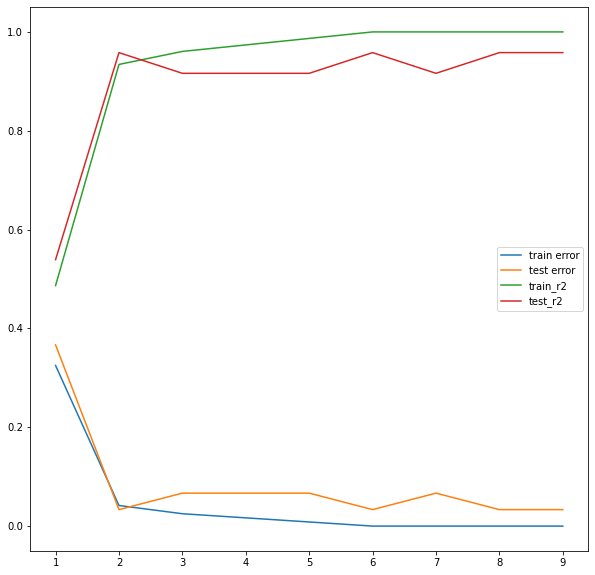

In [103]:
fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.plot(results_df.depth, results_df.train_r2, label="train_r2")
plt.plot(results_df.depth, results_df.test_r2, label="test_r2")
plt.legend()

In [125]:
results_df.sort_values(by=['test_r2'], ascending=False).head(5)

,depth,train_error,test_error,train_r2,test_r2
1,2,0.041667,0.033333,0.934182,0.958101
5,6,0.000000,0.033333,1.000000,0.958101
7,8,0.000000,0.033333,1.000000,0.958101
8,9,0.000000,0.033333,1.000000,0.958101
2,3,0.025000,0.066667,0.960509,0.916201


podemos observar que para la profundida 2, 6, 8, 9 obtenemos el mismo valor de R2, sin embargo se escoge el valor de 2 ya que asi obtenemos un buen resultado y no complicamos mucho nuestro diagrama para el momento de una explicacion.

In [111]:
model = DecisionTreeClassifier(max_depth=2)c
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [112]:
accuracy_score(
    y_true=y_test,
    y_pred=y_test_predic
)

0.9666666666666667

In [113]:
balanced_accuracy_score(
    y_true=y_test,
    y_pred=y_test_predic
)

0.9696969696969697

In [114]:
precision_score(y_true=y_test,
    y_pred=y_test_predic, average='macro')

0.9523809523809524

In [115]:
recall_score(
    y_true=y_test,
    y_pred=y_test_predic, average='macro'
)

0.9696969696969697

In [116]:
recall_score(
    y_true=y_test,
    y_pred=y_test_predic, average='macro'
)

0.9696969696969697

In [117]:
f1_score(
    y_true=y_test,
    y_pred=y_test_predic, average='macro'
)

0.9584859584859583

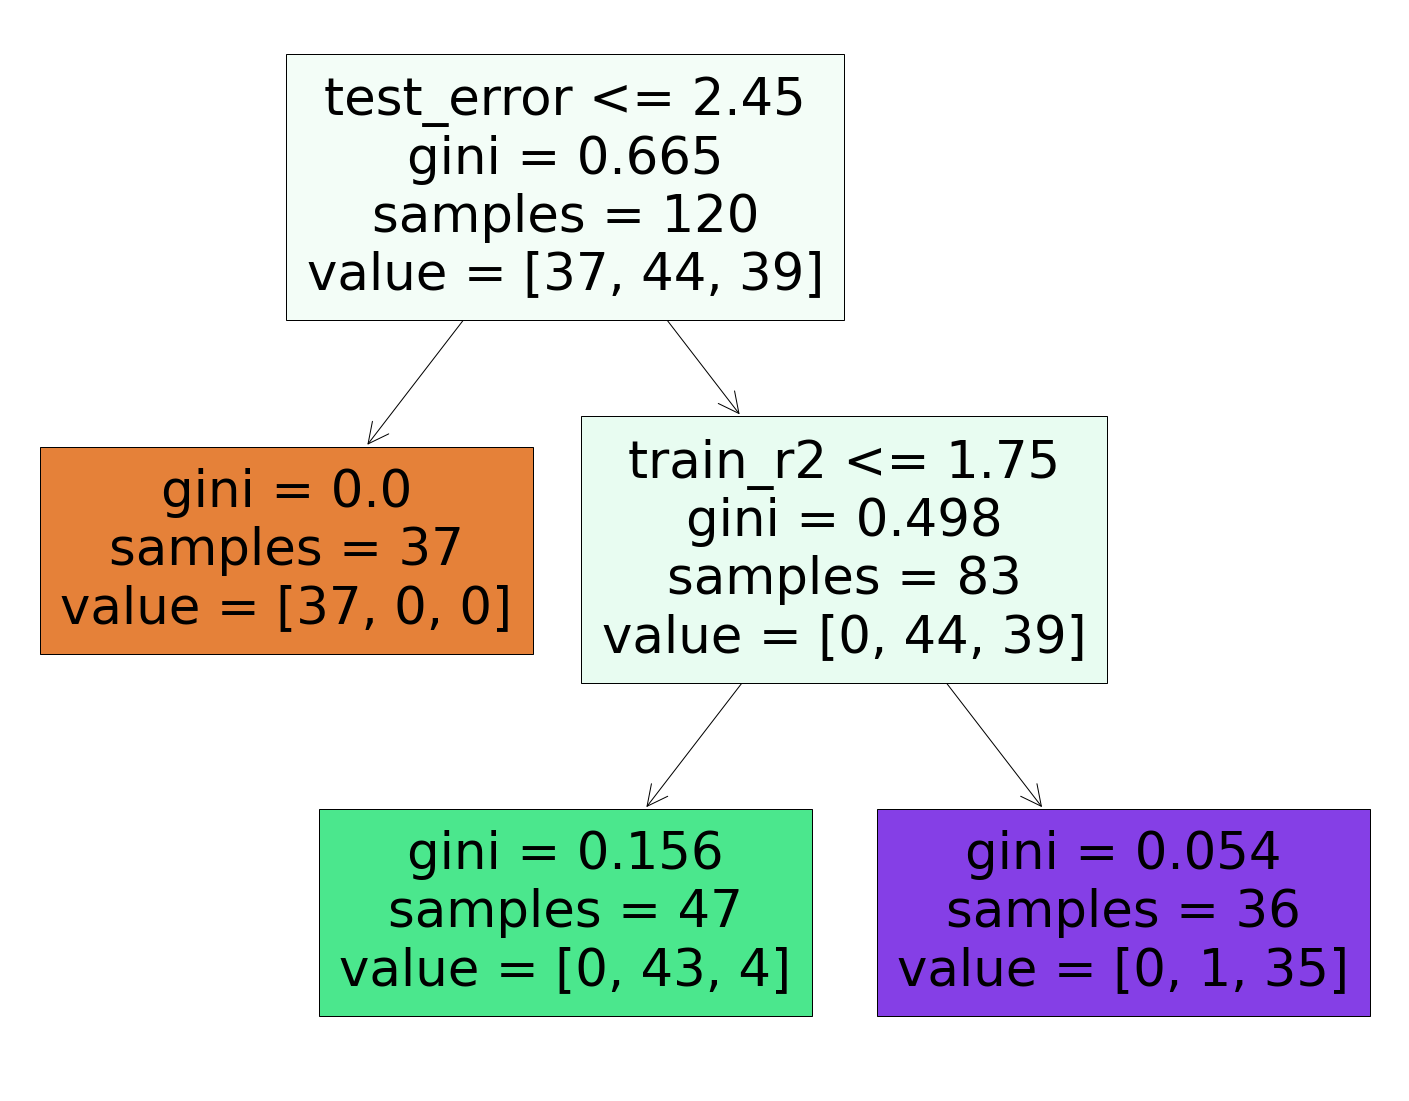

In [118]:

fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

Este fue el resultado obtenido, sin embargo al sacar toda las metricas observamos que dicho modelo esta por debajo de las metricas del otro modelo, por lo tanto no quedamos con el primer modelo.